In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [61]:
df = yf.download('ADA-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440
...,...,...,...,...,...,...,...
1873,2022-12-26,0.259293,0.265307,0.257990,0.265297,0.265297,151542330
1874,2022-12-27,0.265306,0.265969,0.257486,0.260370,0.260370,164331309
1875,2022-12-28,0.260384,0.260842,0.247964,0.248378,0.248378,209596269
1876,2022-12-29,0.248380,0.248460,0.241094,0.244140,0.244140,214425739


In [62]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,0.253154
1869,2022-12-22,0.256523
1870,2022-12-23,0.259429
1871,2022-12-24,0.259368
1872,2022-12-25,0.259270
1873,2022-12-26,0.265297
1874,2022-12-27,0.260370
1875,2022-12-28,0.248378
1876,2022-12-29,0.244140
1877,2022-12-30,0.245557


In [63]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/jppkwdyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/1ss9sjlc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45817', 'data', 'file=/tmp/tmpjb5rn7zm/jppkwdyx.json', 'init=/tmp/tmpjb5rn7zm/1ss9sjlc.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modelieu1jn75/prophet_model-20230105085453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
df = df[:-1]
df

,ds,y
0,2017-11-09,0.032053
1,2017-11-10,0.027119
2,2017-11-11,0.027437
3,2017-11-12,0.023977
4,2017-11-13,0.025808
...,...,...
1872,2022-12-25,0.259270
1873,2022-12-26,0.265297
1874,2022-12-27,0.260370
1875,2022-12-28,0.248378


In [65]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,0.378635,0.219902,0.638325,0.378635,0.378635,0.045930,0.045930,0.045930,-0.000663,-0.000663,-0.000663,0.046593,0.046593,0.046593,0.0,0.0,0.0,0.424564
1,2017-11-10,0.378427,0.193389,0.648370,0.378427,0.378427,0.040352,0.040352,0.040352,-0.001591,-0.001591,-0.001591,0.041942,0.041942,0.041942,0.0,0.0,0.0,0.418778
2,2017-11-11,0.378219,0.209359,0.628473,0.378219,0.378219,0.039507,0.039507,0.039507,0.002433,0.002433,0.002433,0.037075,0.037075,0.037075,0.0,0.0,0.0,0.417727
3,2017-11-12,0.378012,0.201563,0.630409,0.378012,0.378012,0.035419,0.035419,0.035419,0.003392,0.003392,0.003392,0.032027,0.032027,0.032027,0.0,0.0,0.0,0.413431
4,2017-11-13,0.377804,0.175871,0.600460,0.377804,0.377804,0.025717,0.025717,0.025717,-0.001122,-0.001122,-0.001122,0.026839,0.026839,0.026839,0.0,0.0,0.0,0.403520


In [66]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [67]:
future.tail()

,ds
2238,2023-12-26
2239,2023-12-27
2240,2023-12-28
2241,2023-12-29
2242,2023-12-30


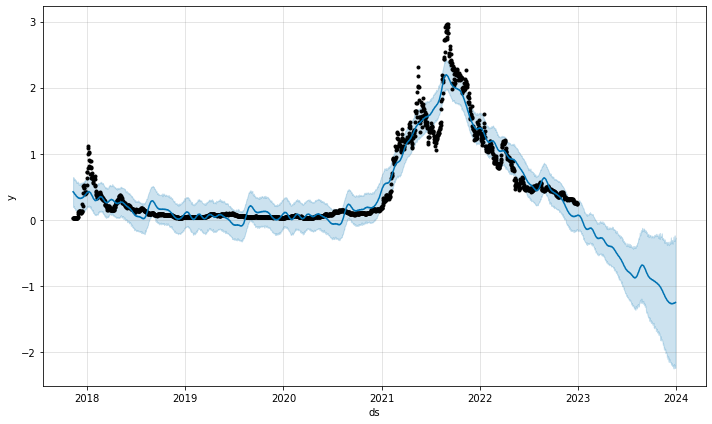

In [68]:
plot1 = m.plot(forecast)